# 앙상블 모델

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

#데이터 불러오기 및 불필요한 변수제거
accident = pd.read_csv("전처리 최종.csv",encoding='cp949') 
accident=accident.drop(["기간","지역"],axis=1,inplace=False)

#GRIDSEARCH를 이용한 최적화
featureColums = list(accident.columns.difference(["발생건수"]))
 
x = accident[featureColums]
y = accident.발생건수
 
trainX ,testX , trainY , testY = train_test_split(x,y,test_size=0.3,random_state=0)

params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(trainX, trainY)
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 200}
최적 예측 정확도: 0.9680


In [7]:
# 랜덤포레스트 모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(trainX, trainY)

RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [8]:
# train rmse
train_predict = rf_run.predict(trainX)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, trainY))) )
 
# test rmse
test_predict = rf_run.predict(testX)
print("RMSE':{}".format(math.sqrt(mean_squared_error(test_predict, testY))) )

RMSE':41.677143247935405
RMSE':58.129075518912195


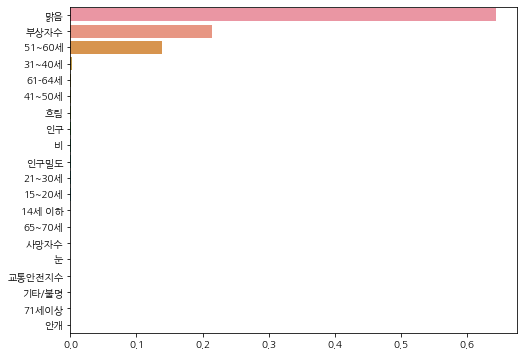

In [9]:
# 모델 변수 중요도 시각화
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=trainX.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()